In [43]:
import pandas as pd
import seaborn as sns
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta

sns.set_style('whitegrid')

indice = ['^BVSP']
hoje = datetime.now()
ultimo_dia = hoje - timedelta(days=366)

dados_mercado_bolsa = pdr.get_data_yahoo(indice, start=ultimo_dia, end=hoje)
dados_mercado_bolsa = dados_mercado_bolsa[['Adj Close','High']]
dados_mercado_bolsa = dados_mercado_bolsa.dropna()
dados_mercado_bolsa = dados_mercado_bolsa.resample('M').last()
dados_mercado_bolsa = dados_mercado_bolsa.pct_change().dropna()
dados_mercado_bolsa

Attributes,Adj Close,High
Symbols,^BVSP,^BVSP
Date,,
2021-11-30,-0.015324,-0.027257
2021-12-31,0.028524,0.021375
2022-01-31,0.072180,0.068643
2022-02-28,0.006709,0.005751
2022-03-31,0.060605,0.068392
2022-04-30,-0.101026,-0.074959
2022-05-31,0.032213,0.000751
2022-06-30,-0.115033,-0.109774


In [23]:
ping = sns.load_dataset('penguins')
ping.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [24]:
ping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
ping.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [26]:
ping.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [27]:
ping.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [28]:
ping.columns = ['especies', 'ilha', 'comprimento_bico', 'largura_bico', 'comprimento_asa', 'massa_corporal_g', 'sexo']

In [29]:
ping

,especies,ilha,comprimento_bico,largura_bico,comprimento_asa,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


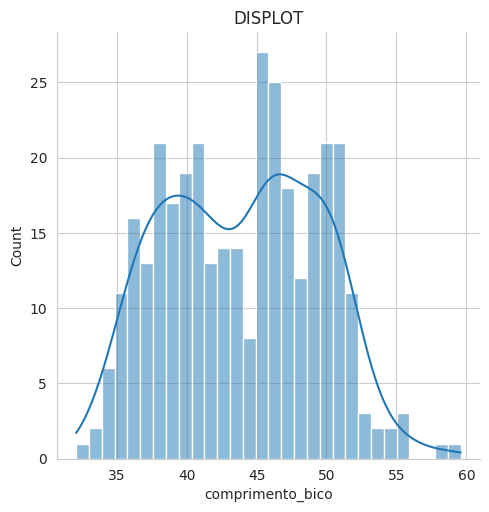

In [30]:
sns.displot(ping['comprimento_bico'], bins=30, kde=True).set(title='DISPLOT')

[Text(0.5, 1.0, 'HISTPLOT')]

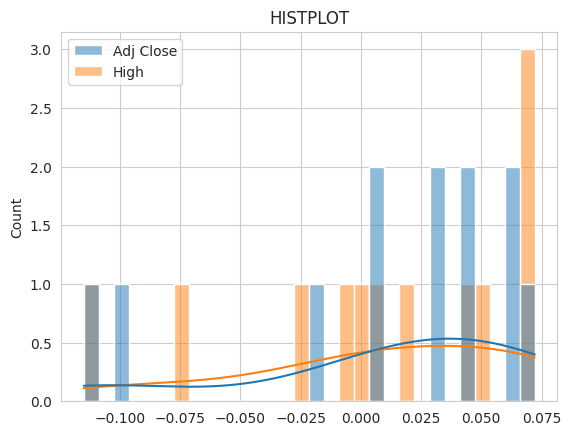

In [44]:
sns.histplot(dados_mercado_bolsa[['Adj Close','High']], bins=30, kde=True).set(title='HISTPLOT')

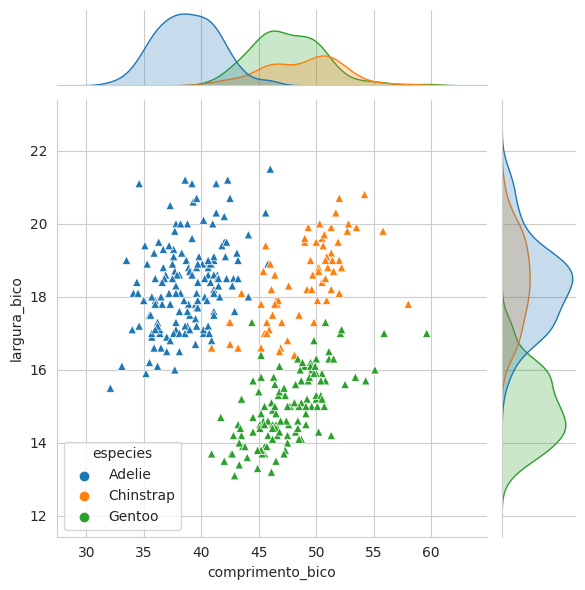

In [34]:
sns.jointplot(data=ping, x='comprimento_bico', y='largura_bico', hue='especies', marker='^')